In [1]:
import numpy as np
import pandas as pd

# Loading Dataset

In [2]:
df = pd.read_csv("housing.csv")
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Dataset shape

In [3]:
df.shape

(20640, 10)

# Checking The NaN Value

In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Dropping The NaN Values

In [5]:
df.dropna(inplace=True)

# DataFrame shape result after 

In [6]:
df.shape

(20433, 10)

# Creating  a new Dataframe

In [7]:
corr_df = df.drop(["latitude","longitude","ocean_proximity"],axis=True)
corr_df.head(5)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


# Finding the corelation

In [8]:
corr_df.corr(method ='pearson')

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


# Creating x and y features

In [9]:
x = df.drop(["median_house_value"],axis=True)

In [10]:
y = np.array(df.median_house_value)


In [11]:
y = y.reshape(20433,1)

# Data Visualization

In [12]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [13]:
columns=["housing_median_age","total_rooms","total_bedrooms","total_bedrooms","total_bedrooms","total_bedrooms","median_house_value"]

In [14]:
import matplotlib.pyplot as plt

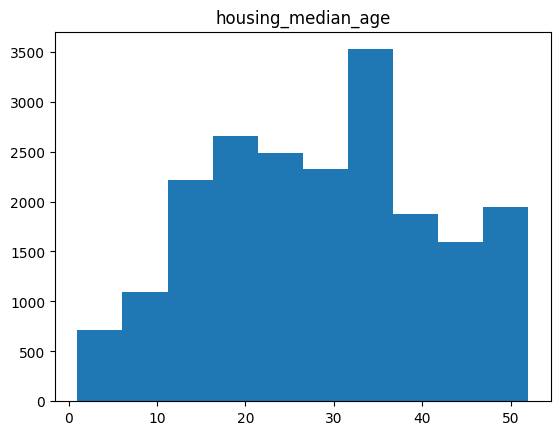

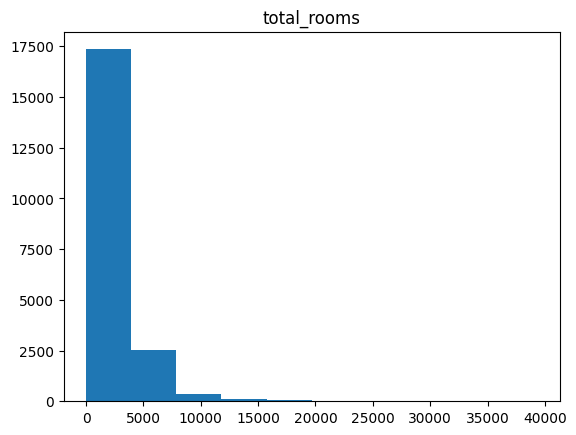

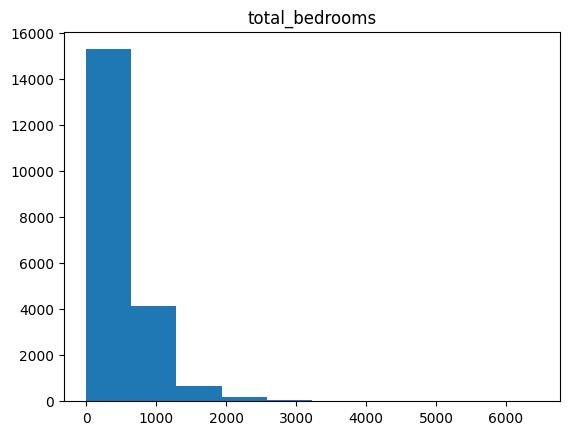

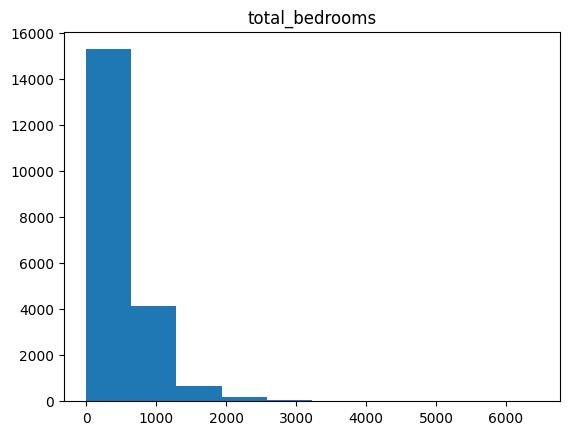

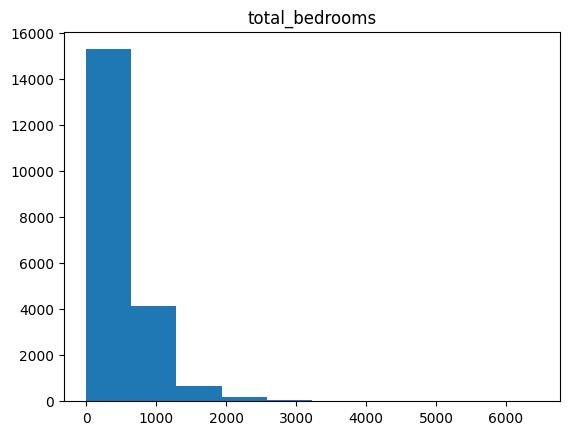

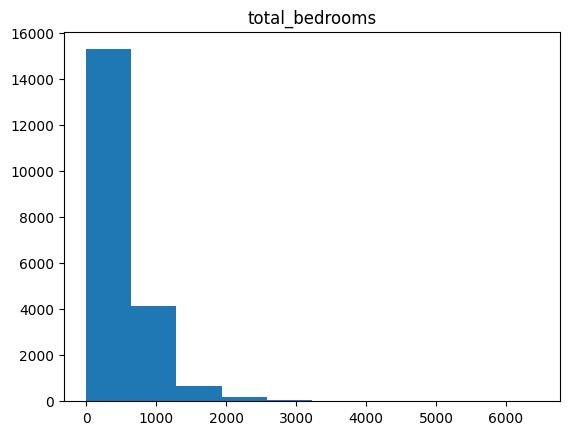

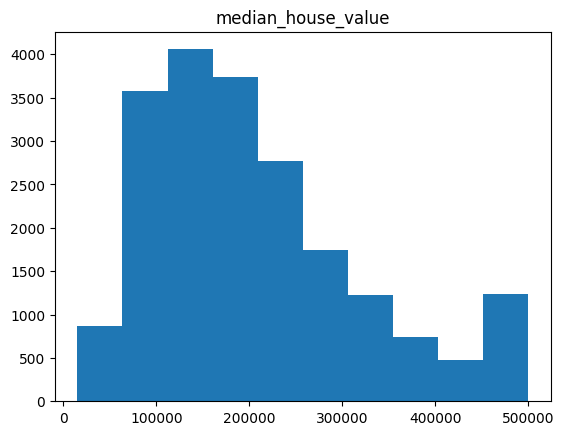

In [15]:
for i in columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

# Finding report

In [16]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# filling NaN Values with dummies

In [17]:
x = pd.get_dummies(x, columns=["ocean_proximity"])

In [18]:
y.shape

(20433, 1)

# Data Splitting

# splitting data into 70:30 ratio

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=30, random_state=0)

# Data Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [21]:
X_train = sc.fit_transform(X_train)
y_train = sc.fit_transform(y_train)

In [22]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)

#view transformed values
print(y_train)

[1113 2201 1552 ...  887 1236  315]


C:\Users\BENSON\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
X_test = sc.fit_transform(X_test)
y_test = sc.fit_transform(y_test)

# Data Visualization

In [24]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Text(0.5, 1.0, 'housing_median_age')

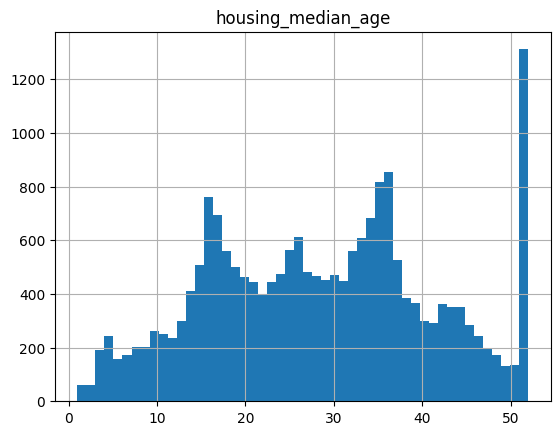

In [25]:
hist_plot = df["housing_median_age"].hist(bins=50)
hist_plot.set_title('housing_median_age')

Text(0.5, 1.0, 'total_rooms')

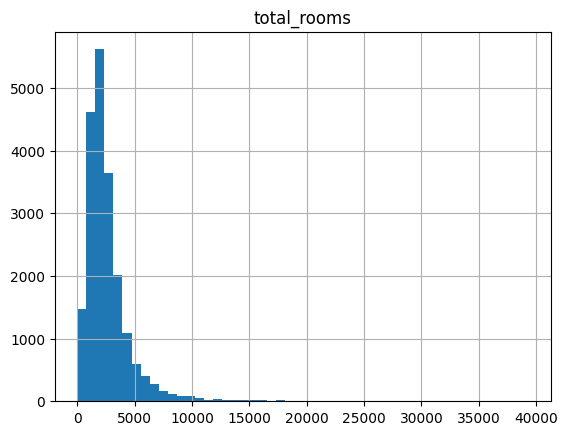

In [26]:
hist_plot = df["total_rooms"].hist(bins=50)
hist_plot.set_title('total_rooms')

Text(0.5, 1.0, 'total_bedrooms')

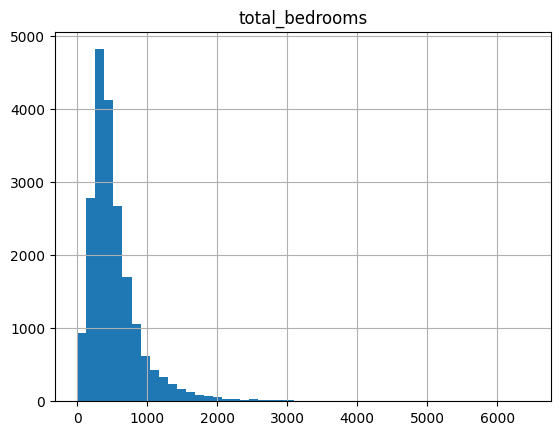

In [27]:
hist_plot = df["total_bedrooms"].hist(bins=50)
hist_plot.set_title('total_bedrooms')

Text(0.5, 1.0, 'population')

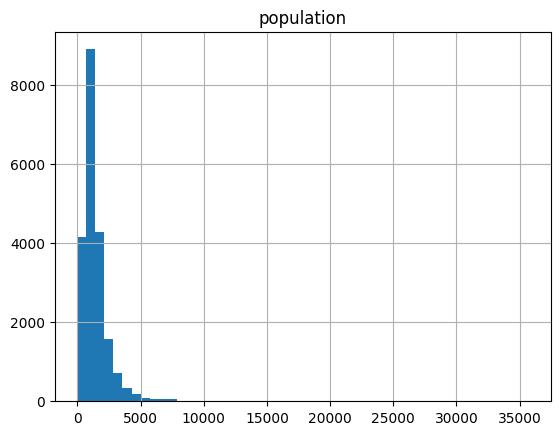

In [28]:
hist_plot = df["population"].hist(bins=50)
hist_plot.set_title('population')

Text(0.5, 1.0, 'households')

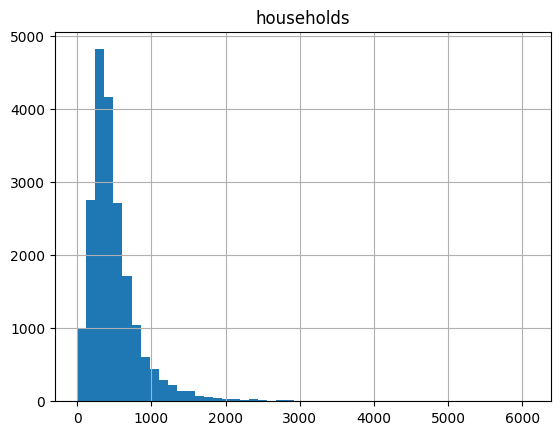

In [29]:
hist_plot = df["households"].hist(bins=50)
hist_plot.set_title('households')

Text(0.5, 1.0, 'median_income')

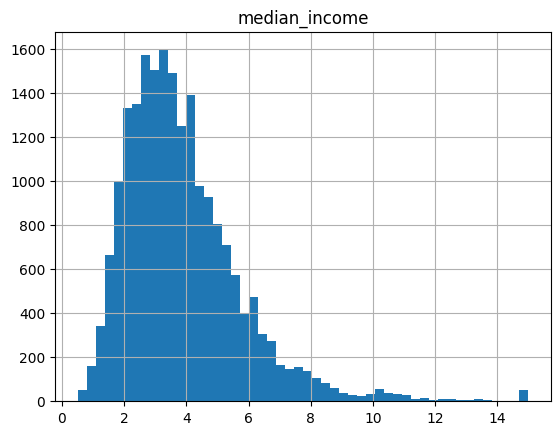

In [30]:
hist_plot = df["median_income"].hist(bins=50)
hist_plot.set_title('median_income')

Text(0.5, 1.0, 'median_house_value')

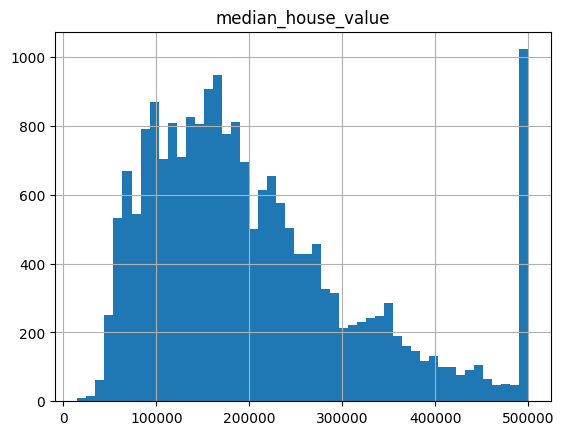

In [31]:
hist_plot = df["median_house_value"].hist(bins=50)
hist_plot.set_title('median_house_value')

# Modelling

#  Logistic Regression classifier 

In [32]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [33]:
model_lr.fit(X_train,y_train)

C:\Users\BENSON\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_preds = model_lr.predict(X_test)

In [35]:
X_test = sc.inverse_transform(X_test)

In [36]:
y_preds = model_lr.predict(X_test)

#  PCA

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X_train)

In [38]:
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [39]:
targetDataframe = df[['median_house_value']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)



Text(0, 0.5, 'PC2')

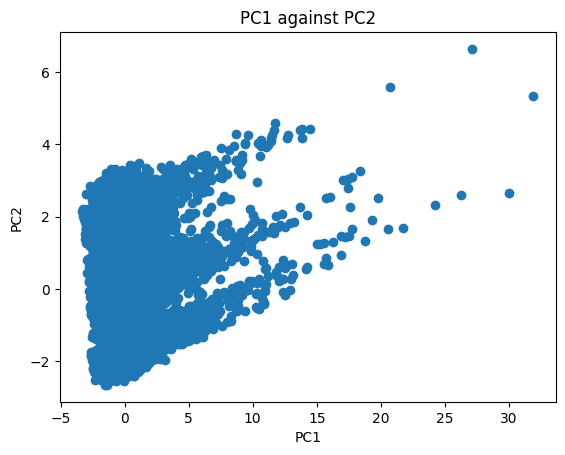

In [40]:
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [41]:
print(pca.explained_variance_ratio_)

[0.30205948 0.19734061]


In [42]:
print(pca.singular_values_)

[283.05115299 228.78467363]


# Calculate MAPE, RMSE  and R2 for the model and report them in the following table. Hint for RMSE set the squared parameter to False


In [43]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_preds)

9071.401445643545

In [44]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_preds, squared=False)


2768.32991141721

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, y_preds)



-7663649.498447217

In [46]:
predicted_median_house_values = df["median_house_value"]

# Evaluation

# Plot a scatter plot using matplotlib.pyplot.scatter function. Plot the predicted median house values on the y-axis vs the actual median house values on the x-axis.

In [47]:
actuval_median_house_values = df["median_house_value"]


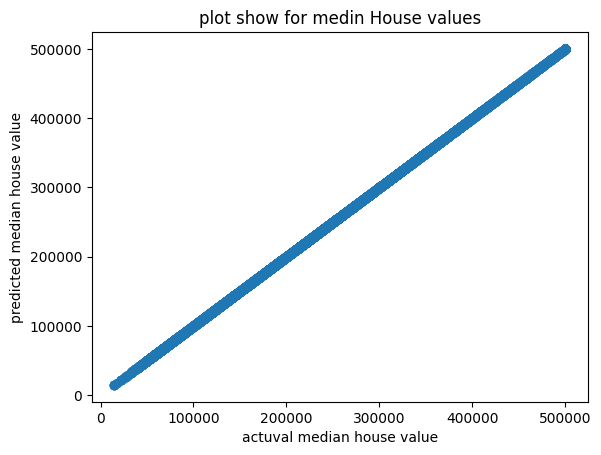

In [48]:
plt.title('plot show for medin House values')
plt.xlabel("actuval median house value")
plt.ylabel("predicted median house value")
plt.scatter(actuval_median_house_values, predicted_median_house_values)
plt.show()



# Calculate MAPE, RMSE  and R2 for the model and report them in the following table. Hint for RMSE set the squared parameter to False.


In [49]:
print('LinearRegression-MAPE', mean_absolute_percentage_error(y_test, y_preds))
print('LinearRegression-MSE',mean_squared_error(y_test, y_preds, squared=False))
print('LinearRegression-R2',r2_score(y_test, y_preds))

LinearRegression-MAPE 9071.401445643545
LinearRegression-MSE 2768.32991141721
LinearRegression-R2 -7663649.498447217


# Discussing

#  (i)Based on the weights of the linear regression model, rank the features (note: only continuous features) in decreasing order of influence on the predictions. 

# ans
Linear regression is one of the simplest and well-known supervised machine learning models. In linear regression, the response variable (dependent variable) is modeled as a linear function of features (independent variables). Linear regression relies on several important assumptions which cannot be satisfied in some applications. In this article, we look into one of the main pitfalls of linear regression: heteroscedasticity.

# (II)Discuss how the influence of the features (obtained in question e.1) relates  to the pair-wise correlation results calculated above i.e., are the features that are highly correlated with the output also the most influential or is there some other phenomenon being observed?


# ans
Using pairwise correlation for feature selection is all about that — identifying groups of highly correlated features and only keeping one of them so that your model can have as much predictive power using as few features as possible.

# (III) Comment about the MAPE, RMSE, R2 results. What can we learn from each of these results about the model prediction performance?

# ans
The essential step in any machine learning model is 
to evaluate the accuracy of the model. 
The Mean Squared Error, Mean absolute error,
Root Mean Squared Error, and R-Squared or Coefficient of determination metrics 
are used to evaluate the performance of the model in regression analysis.

# (IV)Why is centering and scaling the data important before performing PCA?

# ans
PCA is affected by scale, so you need to scale the features in your data before applying PCA. Use StandardScaler from Scikit Learn to standardize the dataset features onto unit scale (mean = 0 and standard deviation = 1) which is a requirement for the optimal performance of many Machine Learning algorithms.